# Import All modul

In [1]:
import bs4
import numpy as np
import pandas as pd
import urllib.request
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
import urllib.request,urllib.parse,urllib.error
import geopandas as gpd

In [2]:
#open link for web scraping
#url="https://www.mohfw.gov.in/"
url="https://covidindia.org"

In [3]:
html=urllib.request.urlopen(url)

In [4]:
#html = open('covid19.html', encoding="utf8")

In [5]:
soup=BeautifulSoup(html,"html.parser")
print(soup)

<!DOCTYPE html>

<html lang="en-US">
<head><style>img.lazy{min-height:1px}</style><link as="script" href="https://covidindia.org/wp-content/plugins/w3-total-cache/pub/js/lazyload.min.js" rel="preload"/>
<meta charset="utf-8"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<!-- This site is optimized with the Yoast SEO plugin v14.6.1 - https://yoast.com/wordpress/plugins/seo/ -->
<title>COVID-19 Tracker Updates For India For State Wise &amp; District Wise Data</title>
<meta content="Coronavirus (COVID-19) updates on cases, treatments, vaccines, &amp; Cure. Latest government advisories &amp; helpline number to prevent COVID-19 infection." name="description">
<meta content="index, follow" name="robots"/>
<meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="googlebot"/>
<meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="bingbot"/>
<link href="https://covidindia.org/" rel="canonical">
<meta 

In [6]:
all_rows=soup.findAll('tr')

In [7]:
print(all_rows)

[<tr class="row-1 odd">
<th class="column-1">State</th><th class="column-2">Confirmed Cases</th><th class="column-3">Recoveries</th><th class="column-4">Deaths</th>
</tr>, <tr class="row-2 even">
<td class="column-1">Andaman and Nicobar Islands</td><td class="column-2">928</td><td class="column-3">277</td><td class="column-4">10</td>
</tr>, <tr class="row-3 odd">
<td class="column-1">Andhra Pradesh</td><td class="column-2">176333</td><td class="column-3">95625</td><td class="column-4">1604</td>
</tr>, <tr class="row-4 even">
<td class="column-1">Arunachal Pradesh</td><td class="column-2">1790</td><td class="column-3">1105</td><td class="column-4">3</td>
</tr>, <tr class="row-5 odd">
<td class="column-1">Assam</td><td class="column-2">48161</td><td class="column-3">33428</td><td class="column-4">115</td>
</tr>, <tr class="row-6 even">
<td class="column-1">Bihar</td><td class="column-2">62031</td><td class="column-3">40760</td><td class="column-4">349</td>
</tr>, <tr class="row-7 odd">
<

In [8]:
#remove All \n from data
def remove_extra(row):
    return[x.text.replace('\n','') for x in row]

In [9]:
states=[]
for row in all_rows:
    
    st=remove_extra(row.findAll('td'))
    if len(st)==4:
        states.append(st)
        
print(states)


[['Andaman and Nicobar Islands', '928', '277', '10'], ['Andhra Pradesh', '176333', '95625', '1604'], ['Arunachal Pradesh', '1790', '1105', '3'], ['Assam', '48161', '33428', '115'], ['Bihar', '62031', '40760', '349'], ['Chandigarh', '1206', '715', '20'], ['Chhattisgarh', '10202', '7613', '69'], ['Dadar & Nagar Haveli; Daman & Diu', '1327', '920', '2'], ['Delhi', '139156', '125226', '4033'], ['Goa', '7075', '5114', '60'], ['Gujarat', '65599', '48376', '2533'], ['Haryana', '37831', '31261', '448'], ['Himachal Pradesh', '2879', '1710', '14'], ['Jammu and Kashmir', '22396', '14856', '417'], ['Jharkhand', '14070', '5199', '129'], ['Karnataka', '145830', '69272', '2704'], ['Kerala', '27956', '16299', '87'], ['Ladakh', '1534', '1127', '7'], ['Lakshadweep', '0', '0', '0'], ['Madhya Pradesh', '35082', '25414', '912'], ['Maharashtra', '457956', '299356', '16446'], ['Manipur', '3018', '1784', '7'], ['Meghalaya', '913', '282', '5'], ['Mizoram', '501', '266', '0'], ['Nagaland', '2405', '657', '4'], 

In [10]:
new_cols=["States","confirmed","Recovered","death"]


In [11]:

df=pd.DataFrame(data=states,columns=new_cols)
df

,States,confirmed,Recovered,death
0,Andaman and Nicobar Islands,928,277,10
1,Andhra Pradesh,176333,95625,1604
2,Arunachal Pradesh,1790,1105,3
3,Assam,48161,33428,115
4,Bihar,62031,40760,349
5,Chandigarh,1206,715,20
6,Chhattisgarh,10202,7613,69
7,Dadar & Nagar Haveli; Daman & Diu,1327,920,2
8,Delhi,139156,125226,4033
9,Goa,7075,5114,60


In [12]:
#df=df.drop('total',axis=1)

In [13]:
df= df.drop(index=[36])

In [14]:
df.shape

(36, 4)

In [15]:
df.sort_values(by='confirmed',axis=0,ascending=False,inplace=True)
#df['confirmed']=df['confirmed'].astype(int)
df


,States,confirmed,Recovered,death
0,Andaman and Nicobar Islands,928,277,10
22,Meghalaya,913,282,5
35,West Bengal,80984,56884,1785
34,Uttarakhand,8008,4847,95
29,Sikkim,783,299,1
31,Telangana,70958,50814,576
9,Goa,7075,5114,60
10,Gujarat,65599,48376,2533
4,Bihar,62031,40760,349
32,Tripura,5520,3675,28


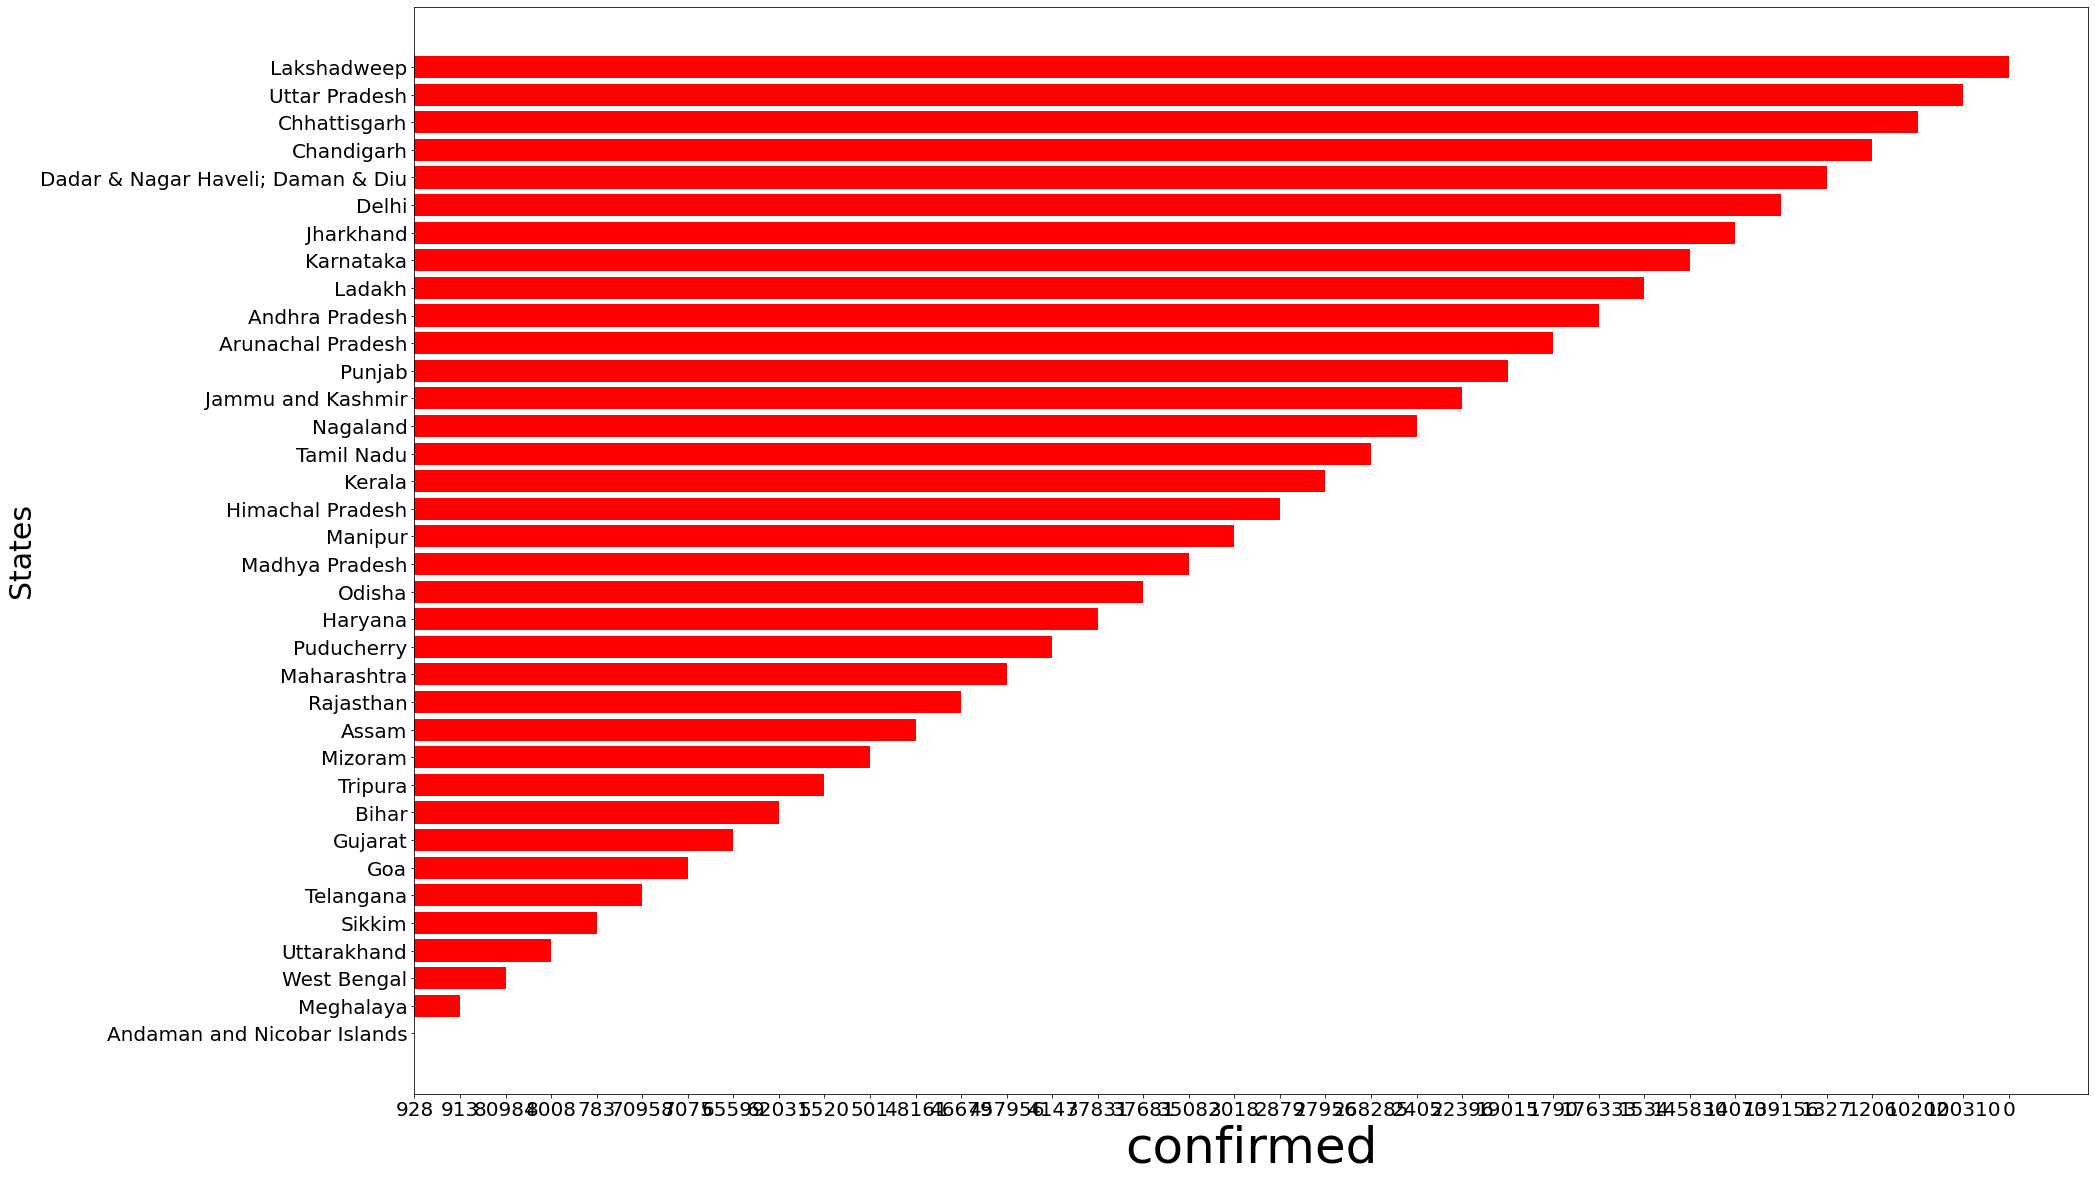

In [29]:
plt.figure(figsize=(30,20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('States',fontsize=30)
plt.xlabel('confirmed',fontsize=50)
plt.barh(df['States'],df['confirmed'],color='red')
plt.show()

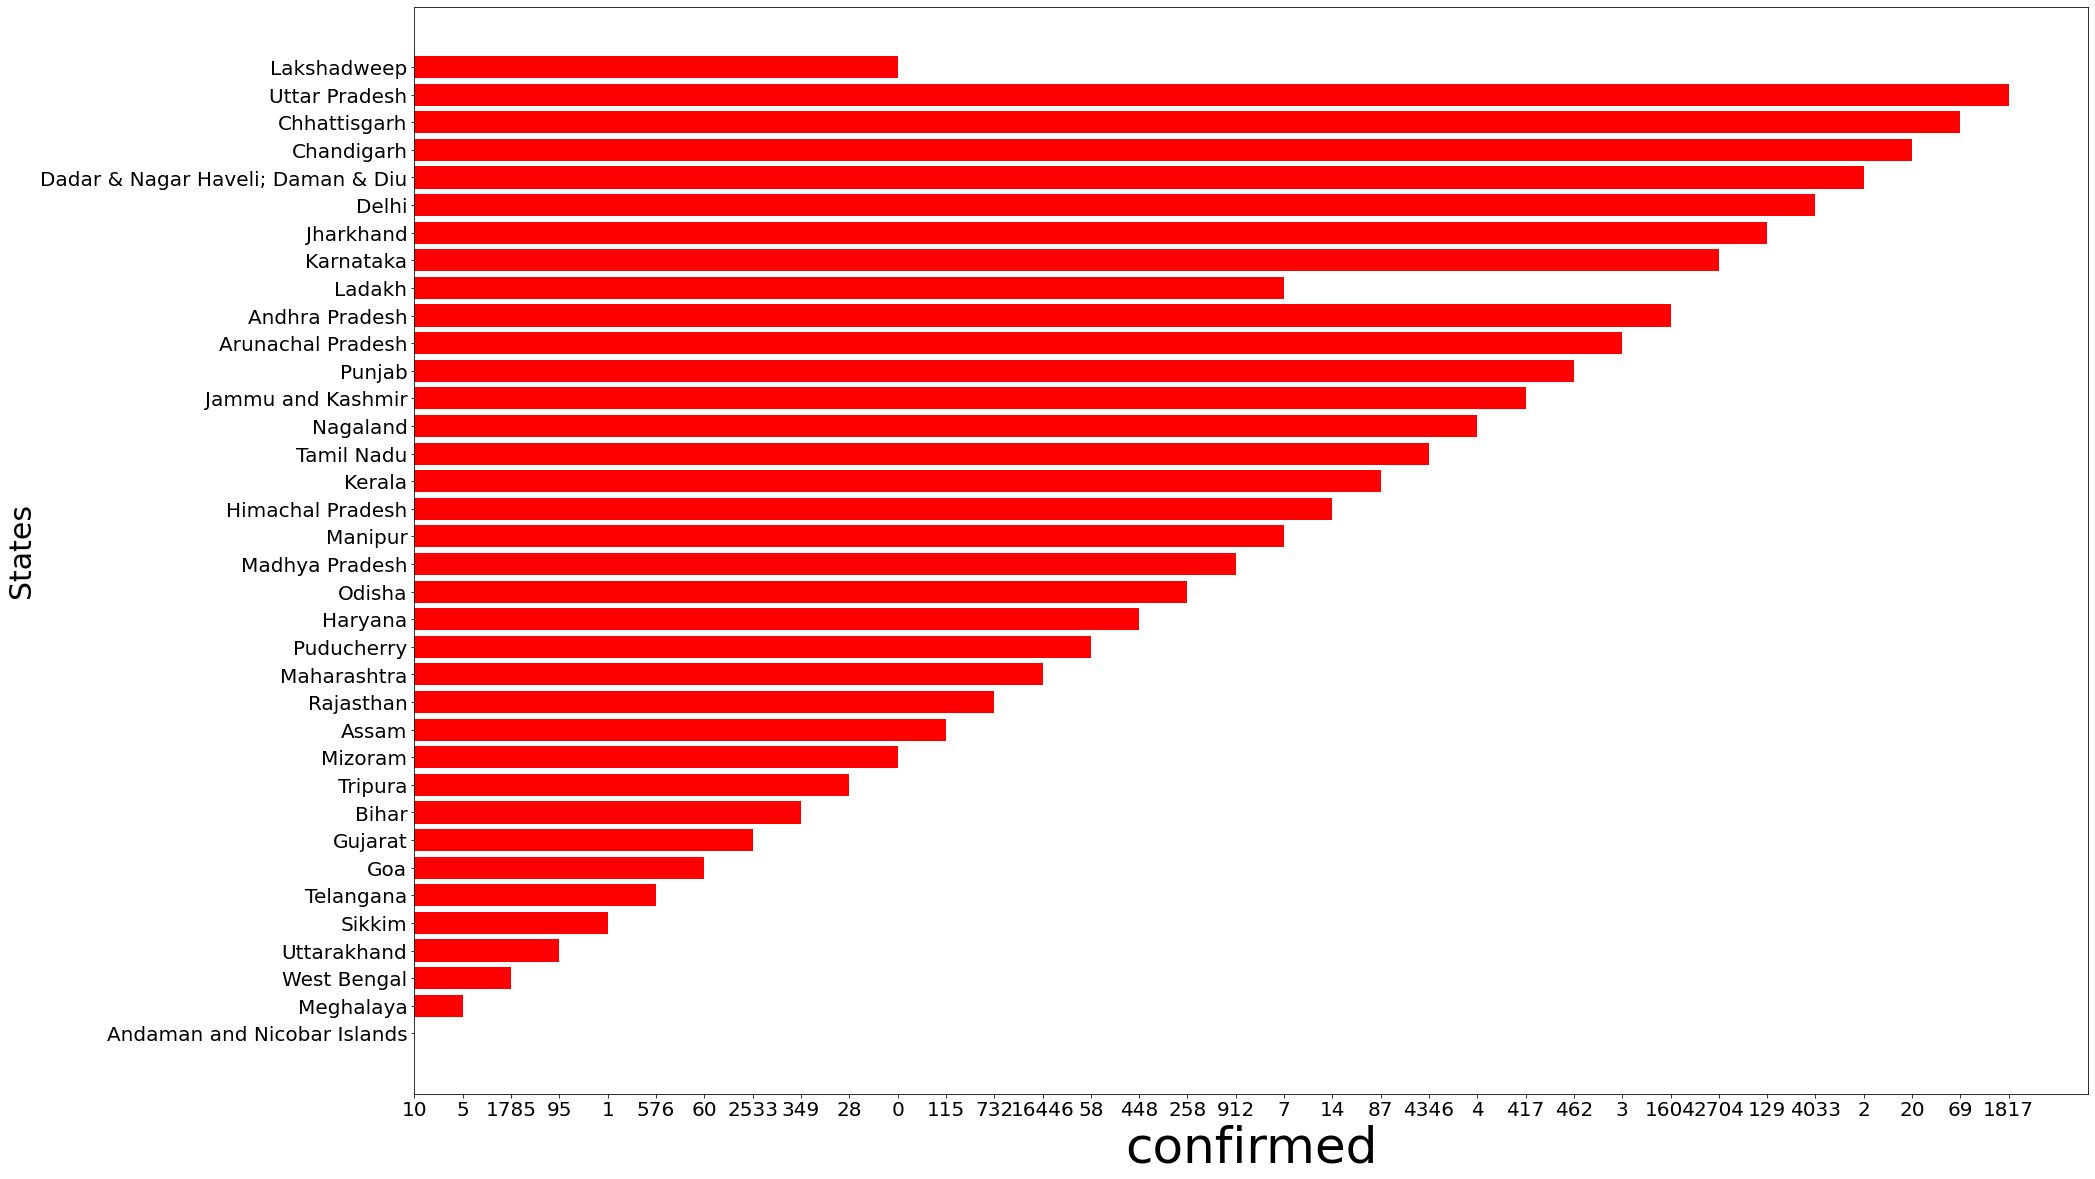

In [33]:
plt.figure(figsize=(30,20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('States',fontsize=30)
plt.xlabel('confirmed',fontsize=50)
plt.barh(df['States'],df['death'],color='red')
plt.show()

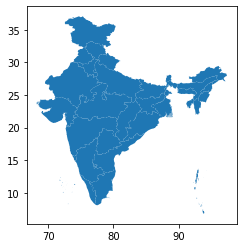

In [17]:
data_map= gpd.read_file('importfile\Indian_States.shp')
data_map.plot()

In [18]:
print(data_map.columns[0])
print(df.columns[1])

st_nm
confirmed


In [19]:
#data_map.rename(columns={'st_nm':'States'},inplace=True)
data_map.rename(columns={'st_nm':'States'},inplace=True )
data_map.shape



(36, 2)

In [20]:
data_map['States']=data_map['States'].str.replace('&','and')
data_map['States'].iloc[0]='Andaman and Nicobar Islands'
data_map['States'].iloc[1]='Arunachal Pradesh'
data_map['States'].iloc[6]='Dadra Nagar Haveli and Daman and Diu'
data_map['States'].iloc[23]='Delhi'
data_map['States'].iloc[29]='Telangana'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
merged=pd.merge(data_map,df,on='States')
merged['confirmed']=merged['confirmed'].astype(int)
merged['death']=merged['death'].astype(int)
merged['Recovered']=merged['Recovered'].astype(int)

In [22]:
merged

,States,geometry,confirmed,Recovered,death
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",928,277,10
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1790,1105,3
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",48161,33428,115
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",62031,40760,349
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",1206,715,20
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",10202,7613,69
6,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",7075,5114,60
7,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",65599,48376,2533
8,Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",37831,31261,448
9,Himachal Pradesh,"POLYGON ((76.79634 33.25490, 76.80351 33.25275...",2879,1710,14


In [23]:
merged.shape


(34, 5)

Text(0.5, 1.0, 'Confirmed Cases')

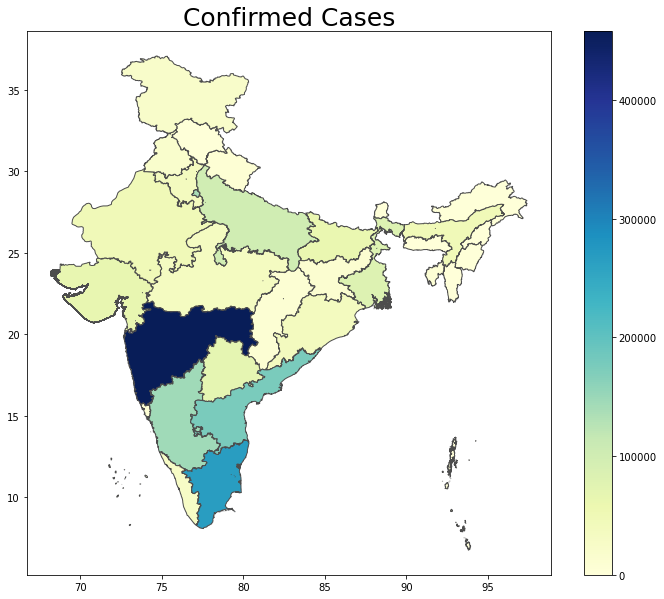

In [24]:
#ax = merged.plot()
fig, ax = plt.subplots(figsize  =(12, 10))
merged.plot(column='confirmed',ax=ax,cmap='YlGnBu',linewidth=1,edgecolor='0.3',legend=True)
ax.set_title("Confirmed Cases", fontsize=25)


Text(0.5, 1.0, 'Death')

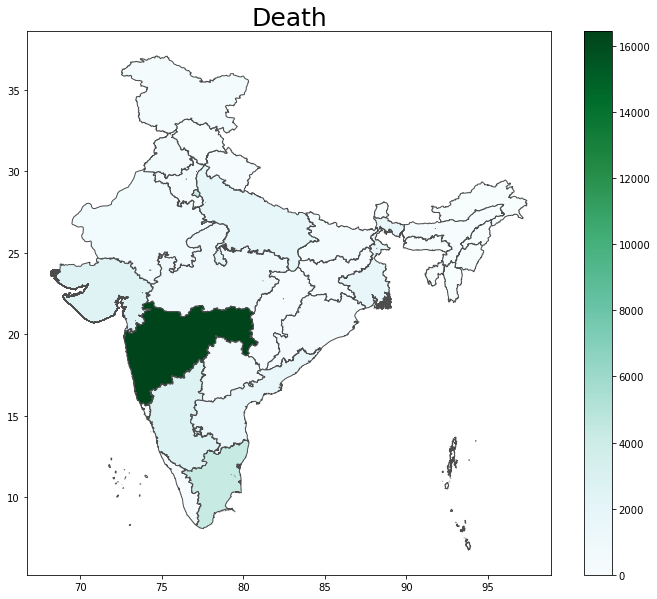

In [25]:
fig, ax = plt.subplots(figsize  =(12, 10))
merged.plot(column='death',ax=ax,cmap='BuGn',linewidth=1,edgecolor='0.3',legend=True)
ax.set_title("Death", fontsize=25)

Text(0.5, 1.0, 'Recovered Cases')

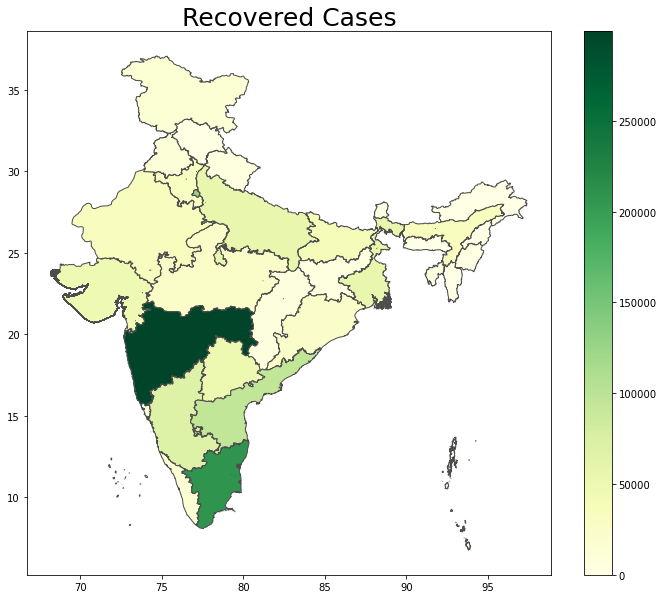

In [26]:
fig, ax = plt.subplots(figsize  =(12, 10))
merged.plot(column='Recovered',ax=ax,cmap='YlGn',linewidth=1,edgecolor='0.3',legend=True)
ax.set_title("Recovered Cases", fontsize=25)